In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('delhivery.csv')

In [3]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

In [4]:
df_numeric_filled = df_numeric.fillna(df_numeric.mean())

In [5]:
df_numeric_filled.isnull().sum()

,0
start_scan_to_end_scan,0
cutoff_factor,0
actual_distance_to_destination,0
actual_time,0
osrm_time,0
osrm_distance,0
factor,0
segment_actual_time,0
segment_osrm_time,0
segment_osrm_distance,0


In [6]:
X=df_numeric_filled.iloc[:,:-1]
y=df_numeric_filled.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

In [9]:
gbr=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=4,min_samples_split=2,random_state=42)

In [10]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=4, random_state=42)

In [11]:
gbr.score(X_test,y_test)*100

87.6739114556871

In [12]:
gbr.score(X_train,y_train)*100

99.89080276037757

In [13]:
y_pred=gbr.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error

In [15]:
mae=mean_absolute_error(y_test,y_pred)
mae

0.1426677348041199

In [16]:
rmse=root_mean_squared_error(y_test,y_pred)
rmse

0.8455421765411845

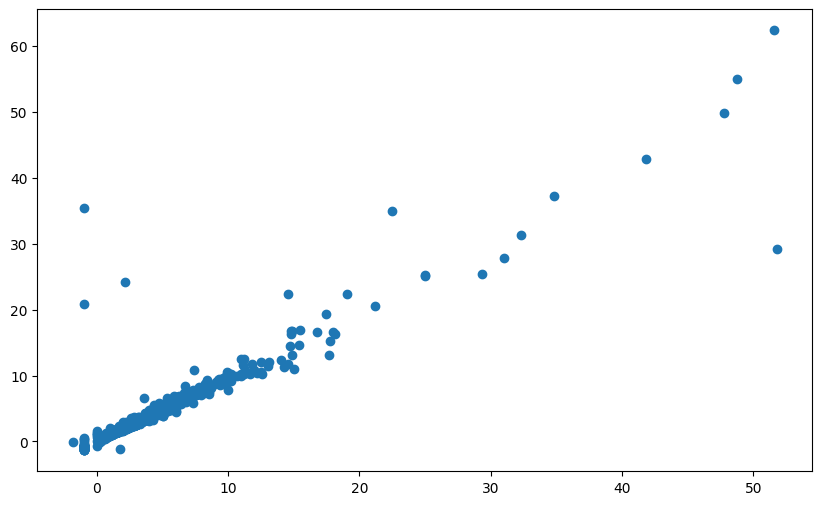

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
plt.show()

In [18]:
from mlxtend.plotting import plot_decision_regions

In [19]:
X2 = X.iloc[:, [0, 1]]

In [20]:
gbr2 = GradientBoostingRegressor()
gbr2.fit(X2, y)

GradientBoostingRegressor()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


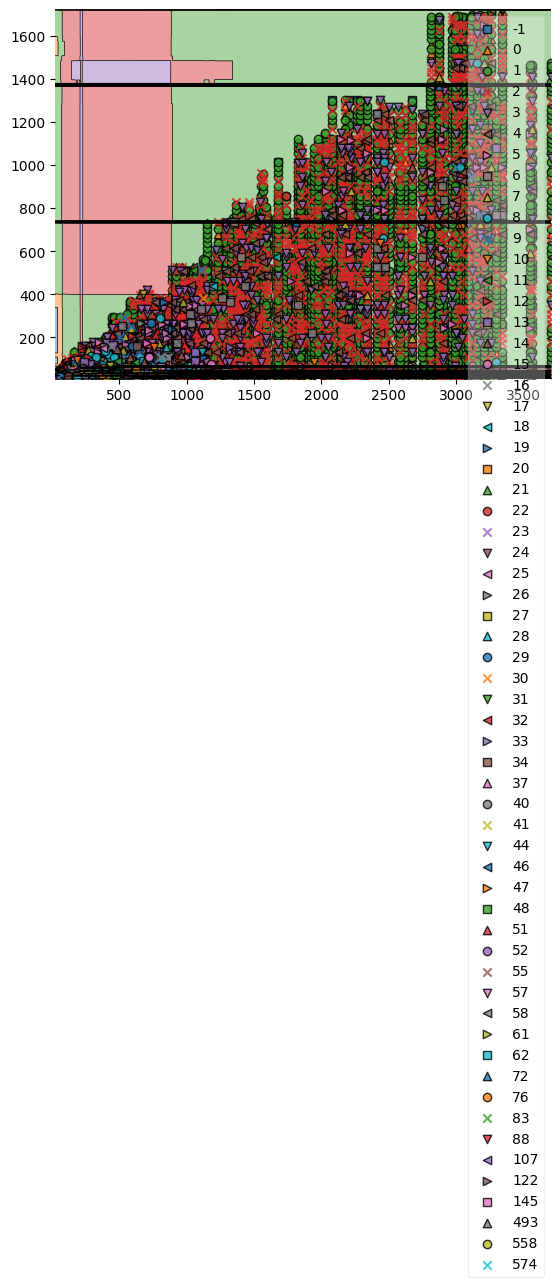

In [21]:
plot_decision_regions(X2.to_numpy(), y.astype(int).to_numpy(), clf=gbr2)
plt.show()